#UTS Pemrograman Lanjut
1. Afif Tri Farhan (18117028)
2. Risyam Najmi 'Adiyat (18117028)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
sns.set()
from math import pi

In [3]:
df1 = pd.read_csv('https://github.com/eueung/pilrek/raw/master/pilrek.csv')
df2 = pd.read_csv('https://github.com/eueung/pilrek/raw/master/pilrek-anon.csv')
df= pd.concat([df1,df2]) # Data anonymous dan data email digabung menjadi 1
df.columns = ['Timestamp', 'Kategori', 'Umur', 'Carek', 'Alasan', 'Harapan']
df


,Timestamp,Kategori,Umur,Carek,Alasan,Harapan
0,9/1/2019 7:47:18,Alumni,25 - 40 th,Jaka Sembiring (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN
1,9/1/2019 8:33:56,Alumni,> 40 th,Suhono Harso Supangkat (STEI),Tipe yg futuristik dan outside-the-box yg bisa...,NaN
2,9/1/2019 8:59:43,Umum,25 - 40 th,Suhono Harso Supangkat (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),Menjadikan itb peningkat sumber daya manusia i...
3,9/1/2019 9:26:44,Pegawai / Tendik,> 40 th,Suhono Harso Supangkat (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN
4,9/1/2019 12:25:40,Dosen,25 - 40 th,Kadarsah Suryadi (FTI-TI),Karakter kepemimpinan dan leadership,NaN
...,...,...,...,...,...,...
2024,9/25/2019 8:54:33,Umum,25 - 40 th,Dicky Rezady Munaf (FSRD),Keberhasilan dan prestasi,Yang bersangkutan telah berhasil dalam mengemb...
2025,9/26/2019 13:30:25,Pegawai / Tendik,25 - 40 th,Kadarsah Suryadi (FTI-TI),Kecerdasan dan keberanian utk kemajuan ITB,NaN
2026,10/8/2019 14:28:00,Alumni,25 - 40 th,Dewi Larasati (SAPPK),"Emansipasi, kesetaraan dan kebhinekaan",NaN
2027,10/8/2019 14:59:53,Alumni,> 40 th,Dewi Larasati (SAPPK),Akhlak dan budi pekerti,ITB jadi universitas yang melahirkan tokoh2 du...


In [4]:
bacakal = df[df['Carek'].str.contains('jaka|kadarsah|benyamin|bramantyo|dwi|edy|saptawati|reini|togar|widjaja', flags = re.IGNORECASE)]
#menyaring Carek menjadi 10 bacakal yang telah ditetapkan

In [5]:
bacakal['Carek'].value_counts()

Edy Tri Baskoro (FMIPA-MA)            413
Kadarsah Suryadi (FTI-TI)             334
Benyamin Sapiie (FITB)                 73
Dwi Larso (SBM / President Univ)       56
Bramantyo (Direktur PPM Manajemen)     42
Jaka Sembiring (STEI)                  26
Togar M Simatupang (SBM)               24
Gusti Ayu Putri Saptawati S (STEI)     17
Widjaja Martokusumo (SAPPK)            13
Reini D Wirahadikusumah (FTSL)          7
Name: Carek, dtype: int64

Pada pengolahan data ini akan digunakan 2 data dengan jumlah responden paling banyak. data yang akan digunakan adalah :
1. Edy Tri Baskoro
2. Kadarsah Suryadi

In [6]:
bacakal2 = bacakal[bacakal['Carek'].str.contains('kadarsah|edy', flags = re.IGNORECASE)]

Text(0.5, 1.0, 'Alasan memilih carek')

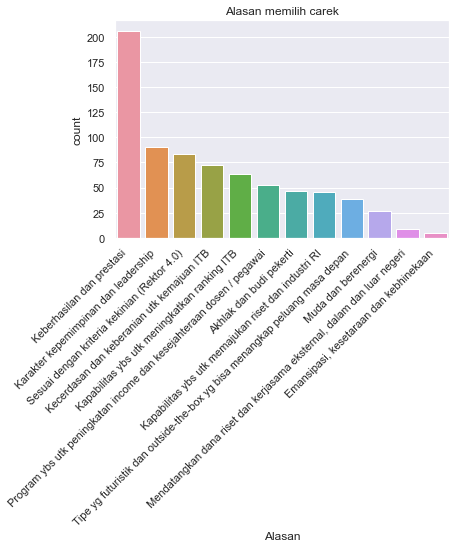

In [7]:
count = bacakal2['Alasan'].value_counts()
alasan = bacakal2[bacakal2['Alasan'].isin(count[count > 3].index)] #menyaring jumlah alasan yang kurang dari 3
chart = sns.countplot(x='Alasan', data=alasan, order = alasan['Alasan'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Alasan memilih carek')

Data diatas merupakan data jumlah frekuensi alasan memilih carek. dari data diatas, akan digunakan 5 data dengan frekuensi paling tinggi untuk analisis berikutnya.

In [24]:
keberhasilan = bacakal2[bacakal2['Alasan'].str.contains('keberhasilan', flags = re.IGNORECASE)]['Carek'].value_counts()
kecerdasan = bacakal2[bacakal2['Alasan'].str.contains('kecerdasan', flags = re.IGNORECASE)]['Carek'].value_counts()
kekinian = bacakal2[bacakal2['Alasan'].str.contains('kriteria', flags = re.IGNORECASE)]['Carek'].value_counts()
karakter = bacakal2[bacakal2['Alasan'].str.contains('karakter', flags = re.IGNORECASE)]['Carek'].value_counts()
kapabilitas = bacakal2[bacakal2['Alasan'].str.contains('kapabilitas', flags = re.IGNORECASE)]['Carek'].value_counts()
alasan_5 = pd.concat([keberhasilan, kecerdasan, kekinian, karakter, kapabilitas],sort=False, axis = 1, keys=['keberhasilan', 'kecerdasan', 'kekinian', 'karakter', 'kapabilitas']).fillna(0).astype(float)
alasan_5

,keberhasilan,kecerdasan,kekinian,karakter,kapabilitas
Edy Tri Baskoro (FMIPA-MA),121.0,48.0,37.0,63.0,53.0
Kadarsah Suryadi (FTI-TI),85.0,24.0,46.0,27.0,56.0


In [25]:
maks1 = alasan_5['keberhasilan'].max() 
maks2 = alasan_5['kecerdasan'].max()
maks3 = alasan_5['kekinian'].max()
maks4 = alasan_5['karakter'].max() 
maks5 = alasan_5['kapabilitas'].max() 
for i in range(0,2):
    alasan_5['keberhasilan'][i] = alasan_5['keberhasilan'][i]/maks1
    alasan_5['kecerdasan'][i] = alasan_5['kecerdasan'][i]/maks2
    alasan_5['kekinian'][i] = alasan_5['kekinian'][i]/maks3
    alasan_5['karakter'][i] = alasan_5['karakter'][i]/maks4
    alasan_5['kapabilitas'][i] = alasan_5['kapabilitas'][i]/maks5
    
#cell ini berfungsi untuk menormalisasi menjadi skala 0-1

In [26]:
alasan_5

,keberhasilan,kecerdasan,kekinian,karakter,kapabilitas
Edy Tri Baskoro (FMIPA-MA),1.000000,1.0,0.804348,1.000000,0.946429
Kadarsah Suryadi (FTI-TI),0.702479,0.5,1.000000,0.428571,1.000000


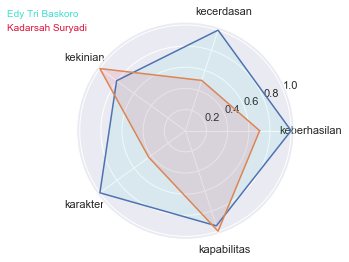

In [27]:
atribut =list(alasan_5)
nomor = len(atribut)

value = alasan_5.iloc[0].tolist()
value += value [:1]
angle = [n / float(nomor) * 2 * pi for n in range(nomor)]
angle += angle [:1]


value2 = alasan_5.iloc[1].tolist()
value2 += value2 [:1]
angle2 = [n / float(nomor) * 2 * pi for n in range(nomor)]
angle2 += angle2 [:1]

ax = plt.subplot(111, polar=True)


plt.xticks(angle[:-1],atribut)


ax.plot(angle,value)
ax.plot(angle2,value2)


ax.fill(angle, value, 'turquoise', alpha=0.1)
ax.fill(angle2, value2, 'crimson', alpha=0.1)


plt.figtext(0.1,0.9,"Edy Tri Baskoro",color="turquoise")
plt.figtext(0.1,0.85,"Kadarsah Suryadi",color="crimson")
plt.show()

Dari gambar radar chart diatas, dapat disimpulkan bahwa bacakal Edy Tri Baskoro unggul dalam alasan 'Kecerdasan dan keberanian untuk memajukan ITB', 'Keberhasilan dan prestasi', dan 'Karakter kepemimpinan dan leadership' 
,sedangkan bacakal Kadarsah Suryadi unggul dalam alasan 'sesuai dengan rektor kekinian (rektor 4.0)', dan 'Kapabilitas ybs untuk meningkatkan ranking ITB'

In [28]:
umur1 = bacakal2[bacakal2['Umur'].str.contains('<')]['Carek'].value_counts()
umur2 = bacakal2[bacakal2['Umur'].str.contains('-')]['Carek'].value_counts()
umur3 = bacakal2[bacakal2['Umur'].str.contains('>')]['Carek'].value_counts()
umur = pd.concat([umur1, umur2, umur3], sort=False, axis=1, keys = ['< 25 th', '25 - 40 th', '> 40 th']).fillna(0)
umur

,< 25 th,25 - 40 th,> 40 th
Edy Tri Baskoro (FMIPA-MA),70,124,219
Kadarsah Suryadi (FTI-TI),61,109,164


Text(0.5, 1.0, 'data umur pemilih carek')

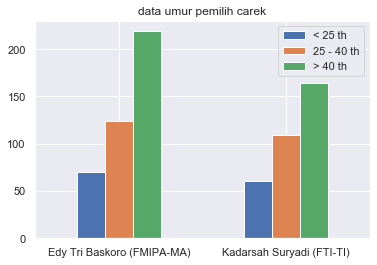

In [29]:
chart = umur.plot(kind='bar', y=['< 25 th', '25 - 40 th', '> 40 th'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
chart.set_title('data umur pemilih carek')

dari kedua data diatas, dapat disimpulkan bahwa data range umur responden paling banyak adalah > 40 tahun, kedua adalah 25-40 tahun, dan yang paling sedikit adalah <25 tahun

In [30]:
Kadarsah = bacakal2[bacakal2.Carek == 'Kadarsah Suryadi (FTI-TI)']
Edy = bacakal2[bacakal2.Carek == 'Edy Tri Baskoro (FMIPA-MA)']

Text(0.5, 1.0, 'Persentase kategori pemilih Edy Tri Baskoro')

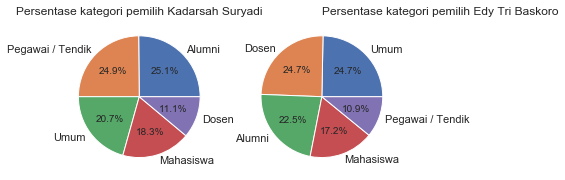

In [31]:
fig, axs = plt.subplots(1,2)

ax1 = Kadarsah['Kategori'].value_counts().plot(ax=axs[0],kind='pie',autopct='%1.1f%%')
ax1.set_ylabel('')
ax1.set_title('Persentase kategori pemilih Kadarsah Suryadi')
ax2 = Edy['Kategori'].value_counts().plot(ax=axs[1],kind='pie',autopct='%1.1f%%')
ax2.set_ylabel('')
ax2.set_title('Persentase kategori pemilih Edy Tri Baskoro', horizontalalignment='left')

persentase pendukung Kadarsah Suryadi yang berasal dari kalangan civitas akademika ITB adalah sebesar 54,3% (Tendik, Dosen, dan Mahasiswa) dan 45.7% sisanya berasal dari kalangan luar (Alumni dan Umum)
persentase pendukung Edy Tri Baskoro yang berasal dari kalangan civitas akademika ITB adalah sebesar 52,8% (Tendik, Dosen, dan Mahasiswa) dan 47.2% sisanya berasal dari kalangan luar (Alumni dan Umum)